#Task-5

### (A) Conduct A Comprehensive Eda On A Dataset.

Step-1-> Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import missingno as msno
import plotly.express as px


Step-2-> Load Dataset

In [ ]:
df = pd.read_csv('/content/netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Step-3-> Basic Info and Overview

In [ ]:
df.shape
df.columns
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


Step-4-> Data Cleaning<br>

*   Handle missing values

*   Strip whitespaces
*   Standardize categorical values


In [ ]:
df.isnull().sum()
df.drop_duplicates(inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', format='mixed')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna("Unknown")



### (B)Identify Trends, Outliers, And Correlations Using Visualizations.

 Step-5-> Univariate Analysis (Trends)

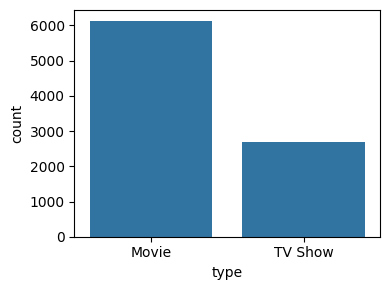

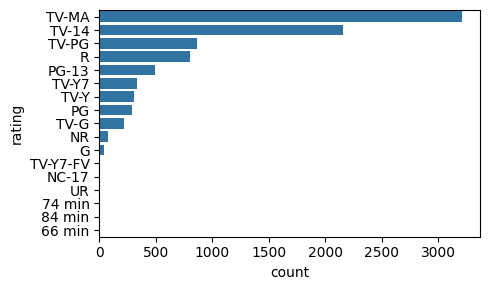

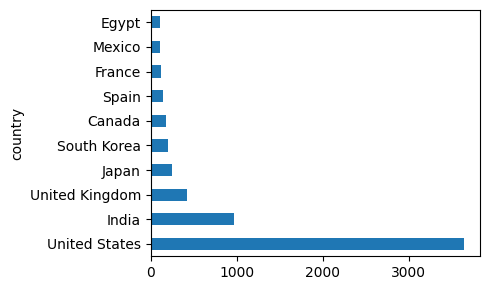

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Content type distribution (smaller figure)
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='type')
plt.tight_layout()
plt.show()

# Ratings distribution (smaller figure)
plt.figure(figsize=(5, 3))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.tight_layout()
plt.show()

# Top countries with most shows (smaller figure)
plt.figure(figsize=(5, 3))
df['country'].value_counts().head(10).plot(kind='barh')
plt.tight_layout()
plt.show()


 Step-6-> Bivariate Analysis (Correlations)

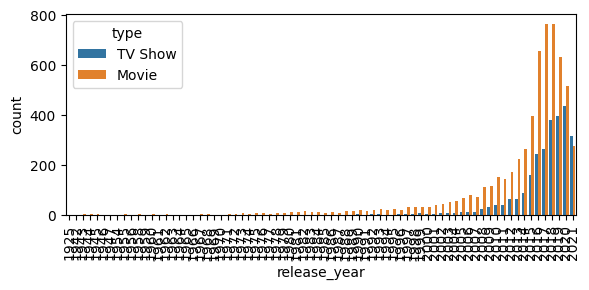

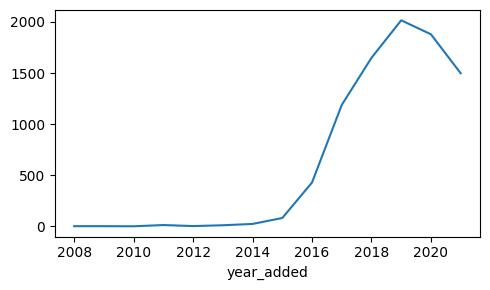

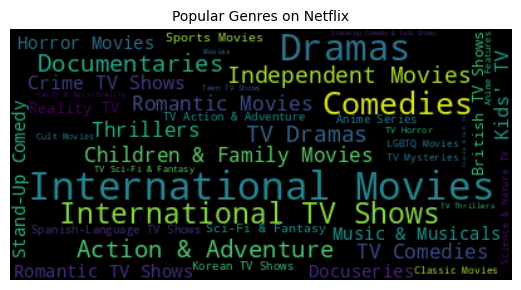

In [ ]:
# Type vs Release Year (smaller figure)
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='release_year', hue='type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Content over time (smaller figure)
plt.figure(figsize=(5, 3))
df.groupby('year_added')['show_id'].count().plot(kind='line')
plt.tight_layout()
plt.show()

# Genre word cloud (smaller word cloud)
genres = df['listed_in'].str.split(', ')
all_genres = [genre for sublist in genres.dropna() for genre in sublist]
genre_counts = Counter(all_genres)
wc = WordCloud(width=400, height=200).generate_from_frequencies(genre_counts)

plt.figure(figsize=(6, 3))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Genres on Netflix', fontsize=10)
plt.tight_layout()
plt.show()

Step-7-> Multivariate Analysis

<Figure size 600x300 with 0 Axes>

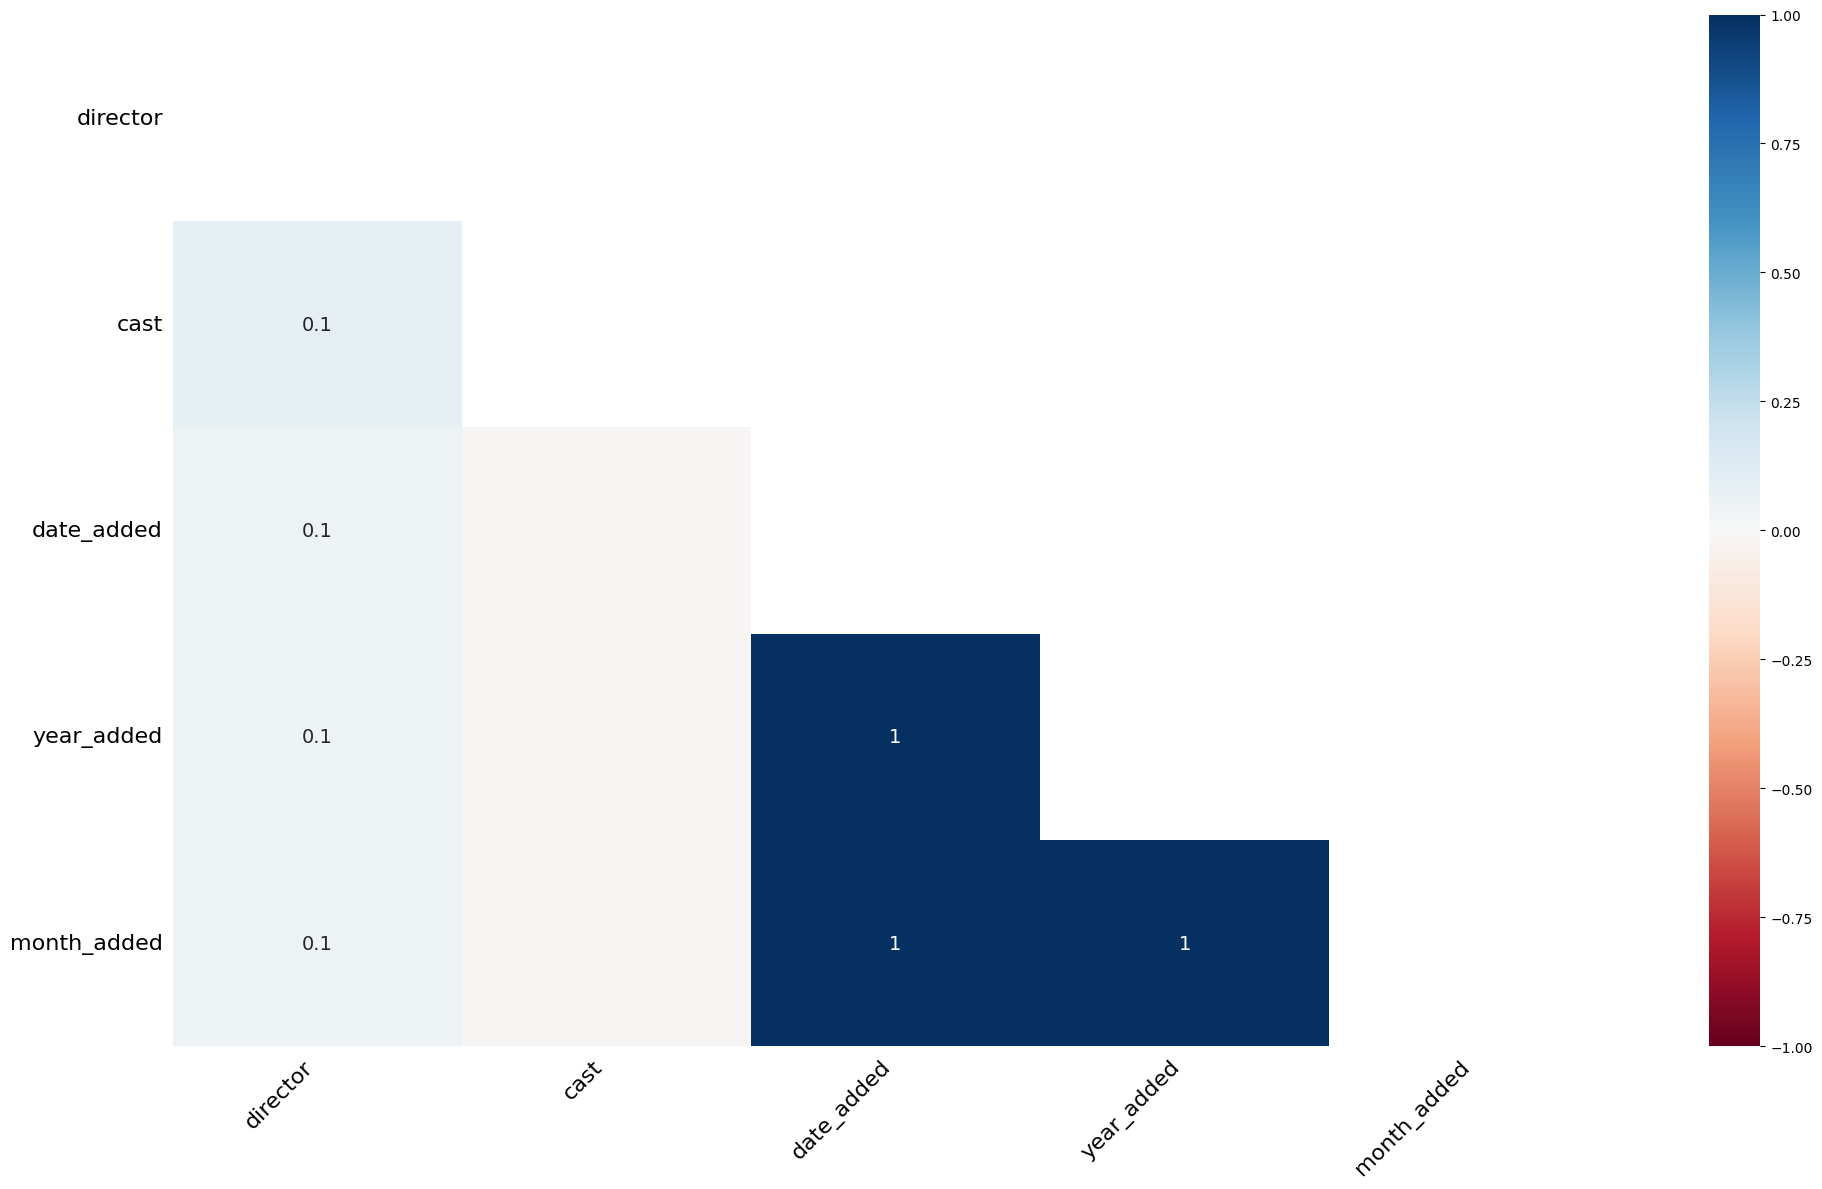

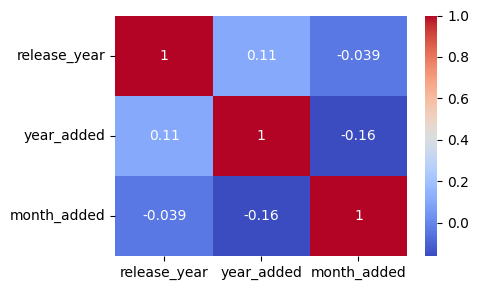

In [ ]:
# Heatmap for nulls (smaller figure)
plt.figure(figsize=(6, 3))
msno.heatmap(df)
plt.tight_layout()
plt.show()

# Correlation heatmap (smaller figure)
plt.figure(figsize=(5, 3))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

Step-8-> Outliers and Anomalies

In [ ]:
# Duration analysis for Movies and Shows
df[df['type'] == 'Movie']['duration'].value_counts().head()
df[df['type'] == 'TV Show']['duration'].value_counts().head()


,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
4 Seasons,95
5 Seasons,65
